In [1]:
import numpy as np
import matplotlib

from qibo import Circuit, gates
from qibo.ui.bloch import Bloch

First of all, let's `plot` an empty Bloch sphere.

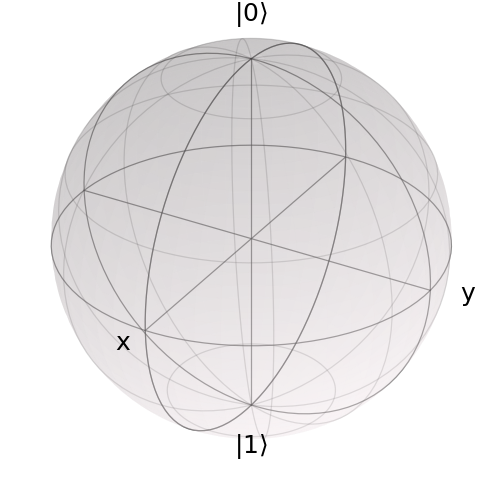

In [2]:
bs = Bloch()
bs.plot()

The `plot` function allows to `save` the plot in .pdf `file`.

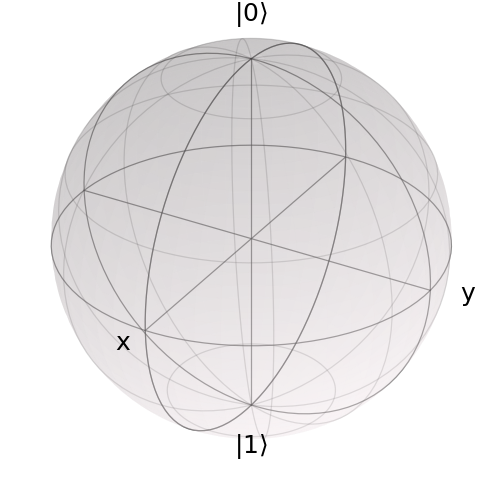

In [17]:
bs.plot(save=True, filename="first_bloch_sphere.pdf")

It is possible to add vectors to the sphere in three different ways with two functions: 

(1) `add_state`: this function allows to add to the sphere the output of a Qibo circuit; \
(2) `add_vector`: this function allows to add to the sphere a vector with three components x, y, z such that x^2 + y^2 + z^2 = 1;

For both functions it is possible to specify:

a. the desired 'color'; \
b. the representation 'mode', which can be either `point`, `vector`.

Let's see these two functions in action.

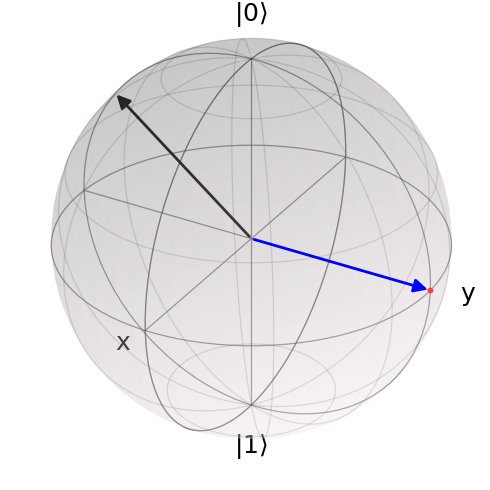

In [15]:
circ = Circuit(1)
circ.add(gates.RX(0, theta=np.random.rand()))
circ.add(gates.RY(0, theta=np.random.rand()))
circ.add(gates.RZ(0, theta=np.random.rand()))
state = circ().state()

bs.add_state(state, color="black", mode="vector")
bs.add_vector(np.array([0, 1, 0]), color="blue", mode="vector")
bs.add_vector(np.array([0, 1, 0]), color="red", mode="point")
bs.plot()

After plotting some states, it is possible to `clear` the sphere.

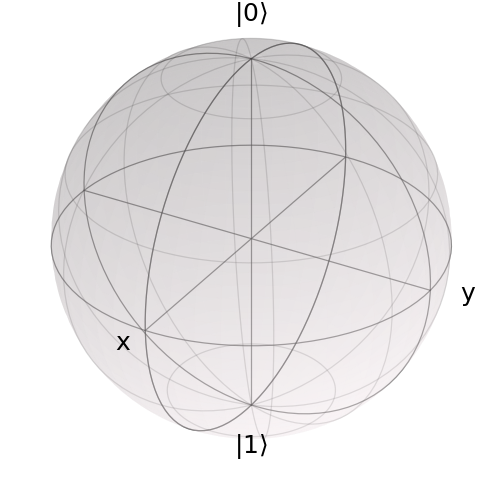

In [18]:
bs.clear()
bs.plot()

The arguments of the functions `add_state` and `add_vector` are:

(1) `add_state`: \
    i. state: np.ndarray, list \
    ii. mode: np.ndarray, list, str \
    iii. color: np.ndarray, list, str 

(2) `add_vector`: \
    i. vector: np.ndarray, list \
    ii. mode: np.ndarray, list, str \
    iii. color: np.ndarray, list, str

Below is an example showcasing some combinations of these arguments.

In [ ]:
bs.add_state(np.array([1, 0]), color="black")
bs.add_state(np.array([0, 1]), color="black")
bs.add_vector(np.array([0, 1, 0]), color="black")

n = 20

states = np.array(shape(n, 2), dtype="complex")
color_states = []
for i in range(n):
    circ = Circuit(1)
    circ.add(gates.RY(q=0, theta=np.random.randn() * 0.1))
    circ.add(gates.RX(q=0, theta=np.random.randn() * 0.1))
    circ.add(gates.RZ(q=0, theta=np.random.randn() * 0.1))
    state = circ().state()
    states[i] = state
    color_states.append("red")

bs.add_state(states, mode="point", color=color_states)

for i in range(n):
    circ = Circuit(1)
    circ.add(gates.RX(q=0, theta=-np.pi / 2))
    circ.add(gates.RY(q=0, theta=np.random.randn() * 0.1))
    circ.add(gates.RZ(q=0, theta=np.random.randn() * 0.1))
    circ.add(gates.RX(q=0, theta=np.random.randn() * 0.1))
    state = circ().state()
    bs.add_state(state, mode="point", color="orange")

for i in range(n):
    circ = Circuit(1)
    circ.add(gates.RY(q=0, theta=np.random.randn() * 0.1))
    circ.add(gates.RX(q=0, theta=np.random.randn() * 0.1))
    circ.add(gates.RZ(q=0, theta=np.random.randn() * 0.1))
    state = circ(np.array([0, 1], dtype="complex")).state()
    bs.add_state(state, mode="point", color="blue")

bs.plot(save=True, filename="multi_class_classification.pdf")